In [1]:
#important library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
df.info

<bound method DataFrame.info of                                                                     Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC   ISI BUI  FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6  1.3 3.4  0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6  1   3.9  0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1  0.3 2.7  0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9  0   1.7  0              not fire   
...                                                                                    ...
26  09    2012 30          65  14  0     85.4 16  44.5 4.5 16.9 6.5                fire   
27  09    2012 28          87  15  4.4   41.1 6.5 8    0.1 6.2  0              not fire   
28  09    2012 27          87  29  0.5   45.9 3.5 7.9  0.4 3.4  0.2            not fire   
29  09    2012 24          54  18  0.1   79.7 4.3 15.2 1.7

we clear see the columns of dataset is not proper format and in data there is 2 different region dataset present for we will sepreate the data by region wise and make index a proper columns

In [4]:
df.columns

Index(['Bejaia Region Dataset '], dtype='object')

In [5]:
df.index

MultiIndex([('day', 'month', 'year', 'Temperature', ' RH', ' Ws', ...),
            ( '01',    '06', '2012',          '29',  '57',  '18', ...),
            ( '02',    '06', '2012',          '29',  '61',  '13', ...),
            ( '03',    '06', '2012',          '26',  '82',  '22', ...),
            ( '04',    '06', '2012',          '25',  '89',  '13', ...),
            ( '05',    '06', '2012',          '27',  '77',  '16', ...),
            ( '06',    '06', '2012',          '31',  '67',  '14', ...),
            ( '07',    '06', '2012',          '33',  '54',  '13', ...),
            ( '08',    '06', '2012',          '30',  '73',  '15', ...),
            ( '09',    '06', '2012',          '25',  '88',  '13', ...),
            ...
            ( '21',    '09', '2012',          '35',  '34',  '17', ...),
            ( '22',    '09', '2012',          '33',  '64',  '13', ...),
            ( '23',    '09', '2012',          '35',  '56',  '14', ...),
            ( '24',    '09', '2012',          '2

In [6]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [7]:
df=df.reset_index()

In [8]:
df

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
df.isnull().sum()

0
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [13]:
df[df['month'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we clearly see it not any null value but a simple header of different region dataset so we make two different file of each region dataset

In [14]:
df=df.drop(df.index[122])

In [15]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [16]:
df1=df[:122]

In [17]:
df2=df[123:]

so now we divide the dataset by region wise

In [18]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
119,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
120,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
121,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 122
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          122 non-null    object
 1   month        122 non-null    object
 2   year         122 non-null    object
 3   Temperature  122 non-null    object
 4    RH          122 non-null    object
 5    Ws          122 non-null    object
 6   Rain         122 non-null    object
 7   FFMC         122 non-null    object
 8   DMC          122 non-null    object
 9   DC           122 non-null    object
 10  ISI          122 non-null    object
 11  BUI          122 non-null    object
 12  FWI          122 non-null    object
 13  Classes      122 non-null    object
dtypes: object(14)
memory usage: 14.3+ KB


now we can see all features are in object type but there is numerical values also so we will convert all object to int and float

In [3]:
df1.to_csv('Bejaia_Region_Dataset.csv',index=False)

In [4]:
df1=pd.read_csv("Bejaia_Region_Dataset.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [6]:
df1["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire '],
      dtype=object)

we can see that there is only 2 category but becoz of space it showing 6 category

In [7]:
d=df1["Classes  "].str.strip()

In [8]:
d1=pd.DataFrame(d)

In [9]:
d1

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
117,not fire
118,fire
119,not fire
120,not fire


In [10]:
df1=df1.drop(['Classes  '],axis=1)

In [11]:
df1=pd.concat([df1, d], axis=1, join="inner")

In [12]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [13]:
df1['Classes  '].unique()

array(['not fire', 'fire'], dtype=object)

In [14]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df1.replace({"fire": 0, "not fire": 1}, inplace = True)

now we have to do same to df2 or Sidi-Bel Abbes Region Dataset also

In [32]:
df2.to_csv('Sidi_Bel_Abbes_Region_Dataset.csv',index=False)

In [33]:
df2=pd.read_csv("Sidi_Bel_Abbes_Region_Dataset.csv")

In [34]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [35]:
f=df2["Classes  "].str.strip()

In [36]:
d2=pd.DataFrame(f)

In [37]:
df2=df2.drop(['Classes  '],axis=1)

In [38]:
df2=pd.concat([df2, d2], axis=1, join="inner")

# EDA

In [15]:
df1.year.unique()

array([2012], dtype=int64)

so we can drop year column

In [16]:
df1.drop('year',axis=1,inplace=True)

In [17]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


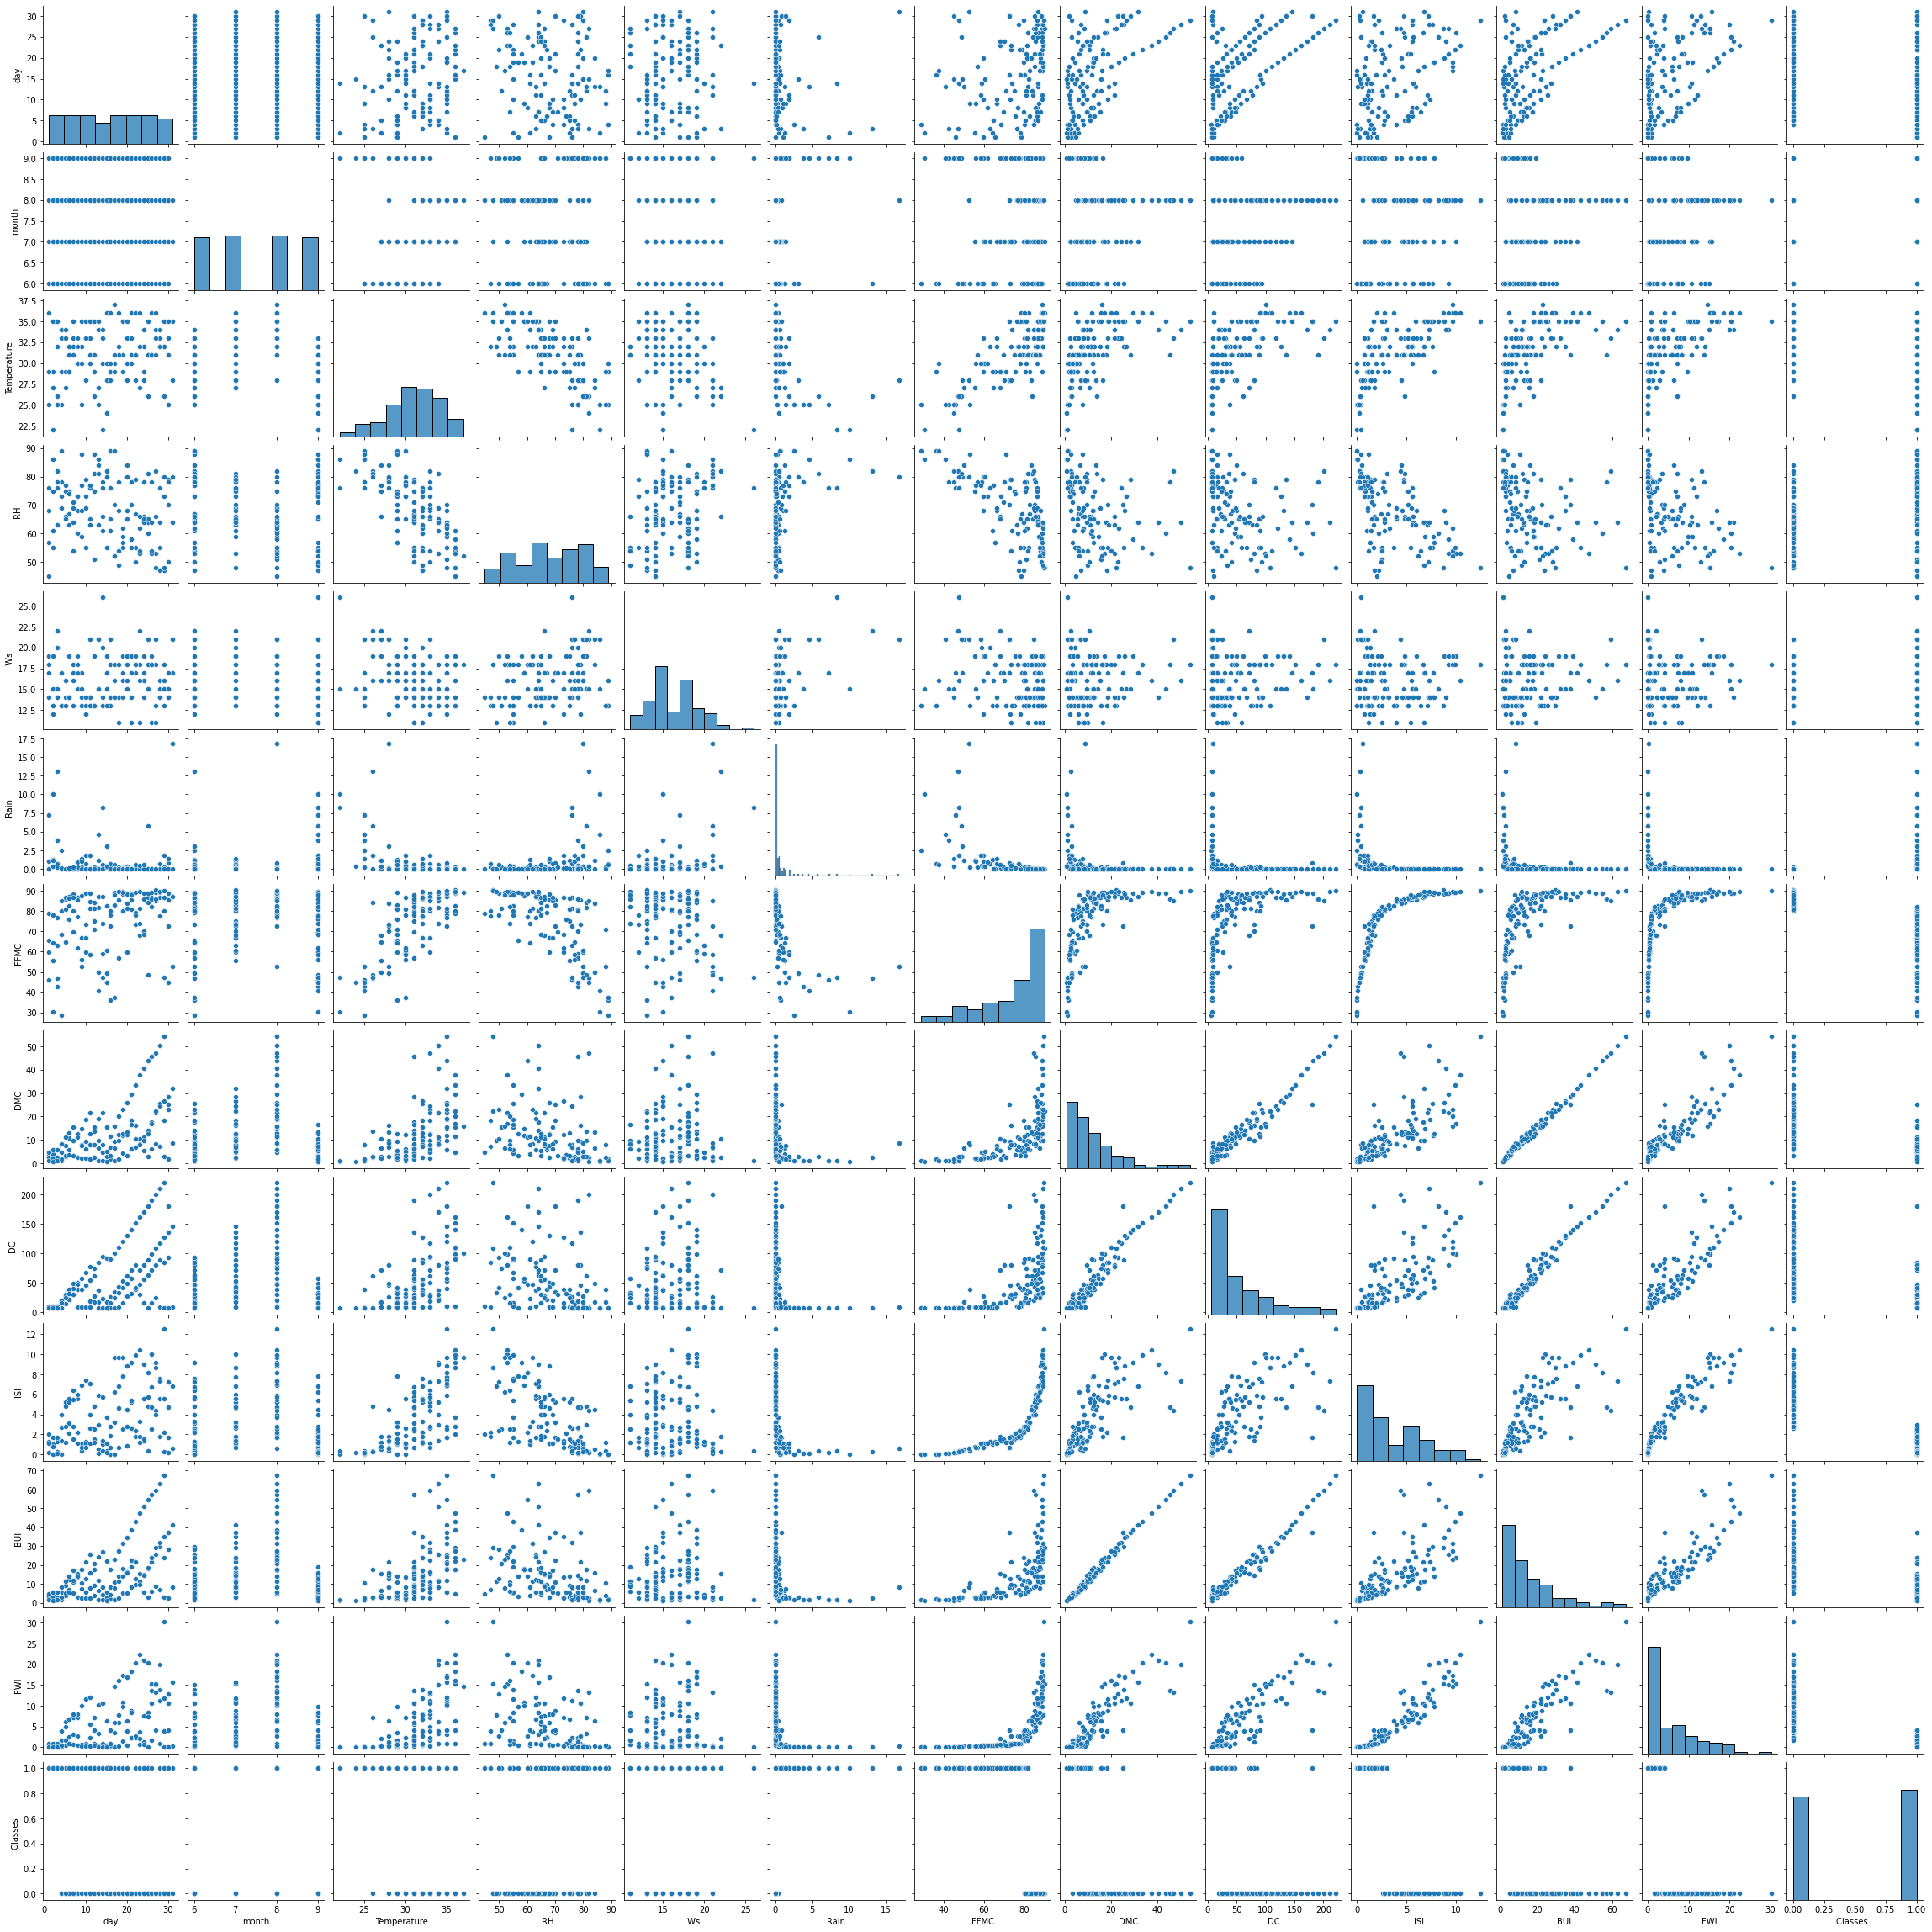

In [48]:
sns.pairplot(df1)

In [52]:
df1['Classes  '].value_counts()

1    63
0    59
Name: Classes  , dtype: int64

so there is no imbalance data in dataset

df1.duplicated().sum()

In [57]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='count'>

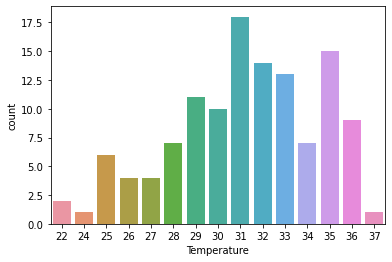

In [59]:
sns.countplot(x='Temperature',data=df1)

<AxesSubplot:>

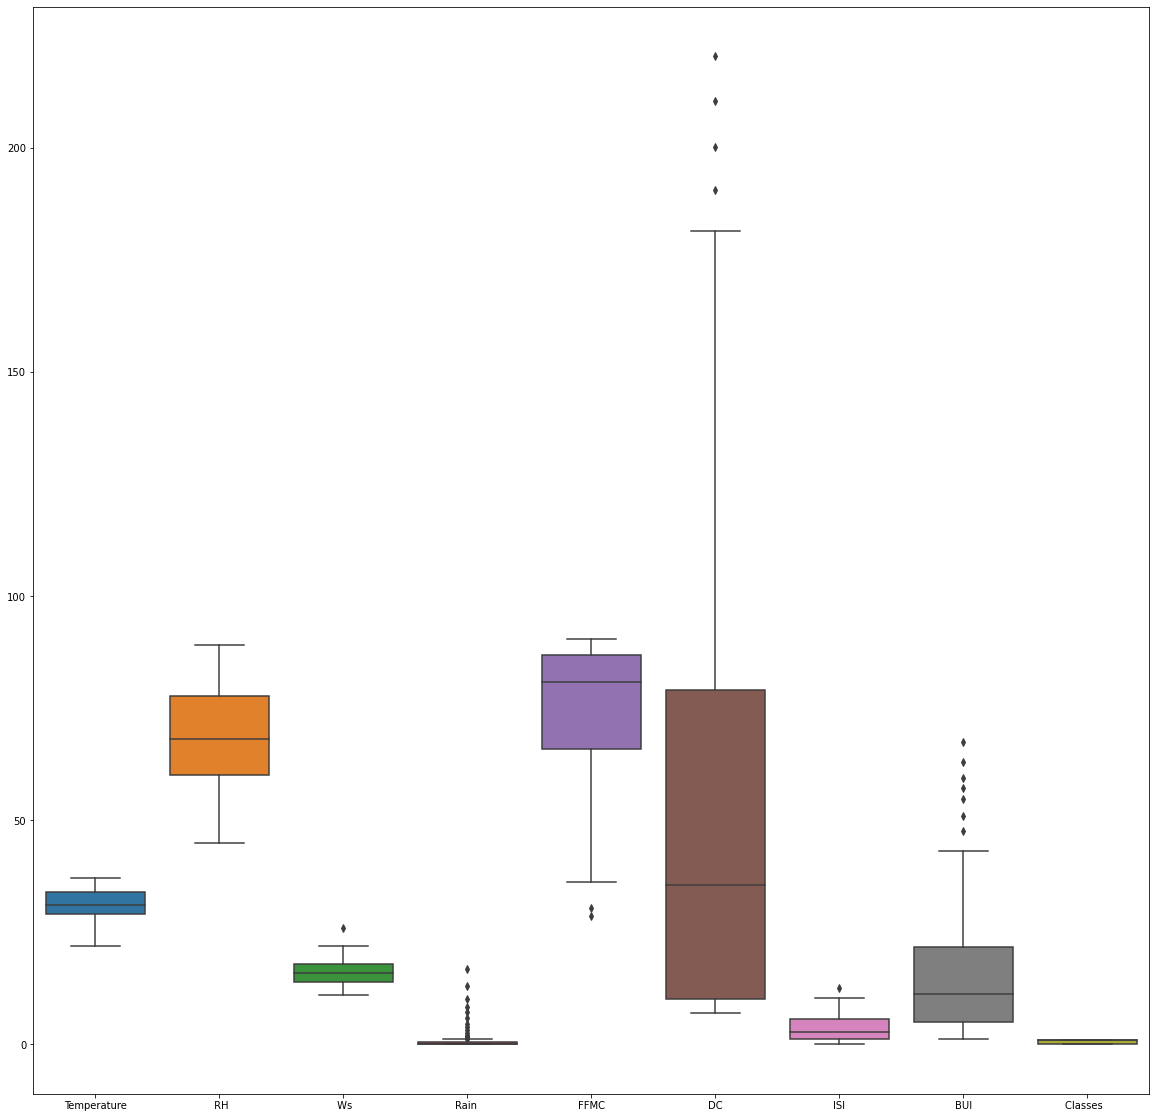

In [90]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df1 , ax = ax)

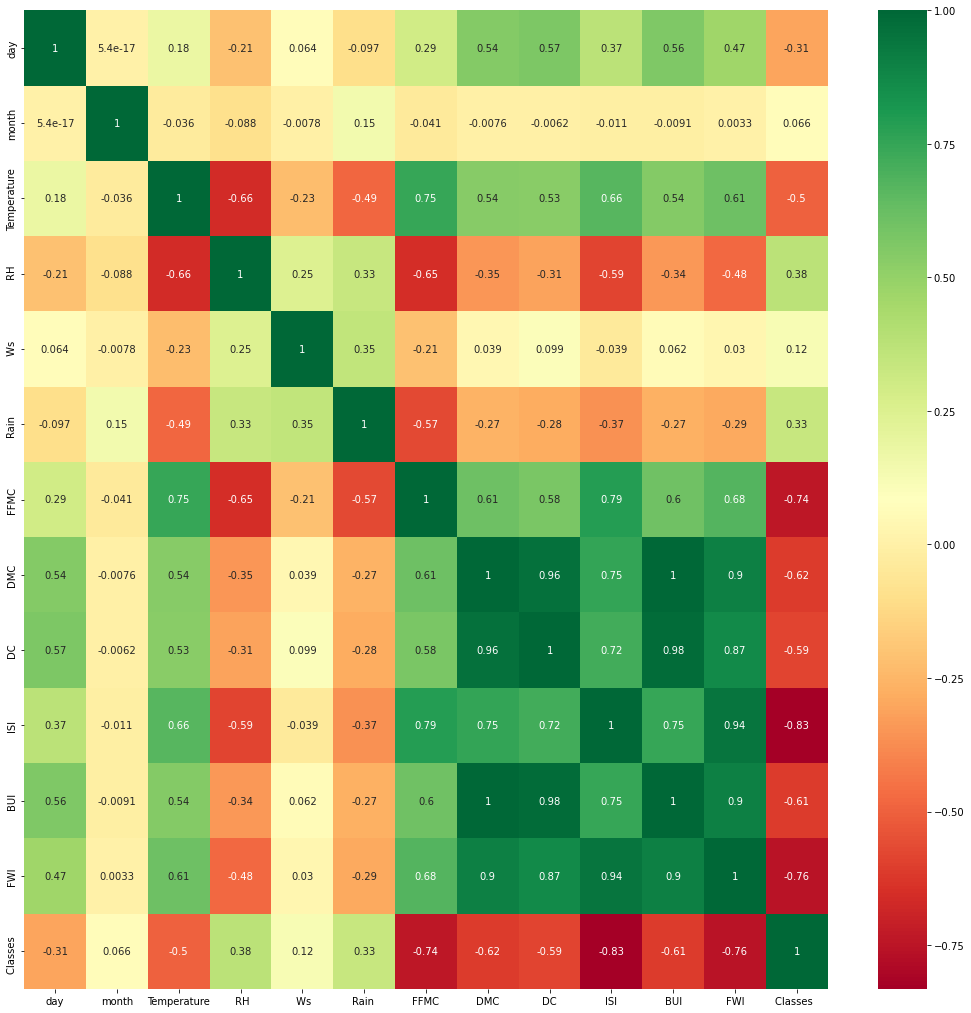

In [65]:
plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

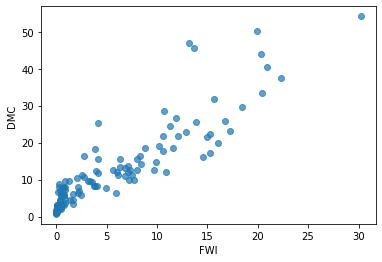

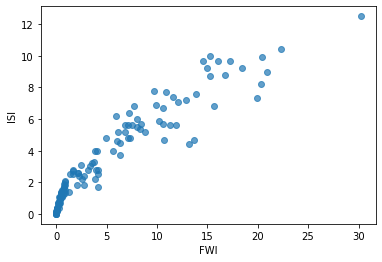

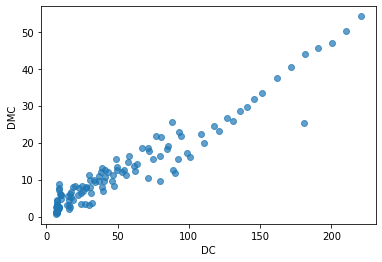

In [67]:
import matplotlib.pyplot as plt
plt.scatter(df1['FWI'],df1['DMC'], alpha = 0.7)
plt.xlabel('FWI')
plt.ylabel('DMC')
plt.show()

plt.scatter(df1['FWI'],df1['ISI'], alpha = 0.7)
plt.xlabel('FWI')
plt.ylabel('ISI')
plt.show()

plt.scatter(df1['DC'],df1['DMC'], alpha = 0.7)
plt.xlabel('DC')
plt.ylabel('DMC')
plt.show()

DMC and FWI is highly corr so drop them

In [23]:
df1.drop(['FWI','DMC'],axis=1,inplace=True)
df1.drop(['day','month'],axis=1,inplace=True)

In [22]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,7.6,1.3,3.4,1
1,29,61,13,1.3,64.4,7.6,1.0,3.9,1
2,26,82,22,13.1,47.1,7.1,0.3,2.7,1
3,25,89,13,2.5,28.6,6.9,0.0,1.7,1
4,27,77,16,0.0,64.8,14.2,1.2,3.9,1


In [24]:
X=df1.iloc[:,:-1]

In [25]:
X

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI
0,29,57,18,0.0,65.7,7.6,1.3,3.4
1,29,61,13,1.3,64.4,7.6,1.0,3.9
2,26,82,22,13.1,47.1,7.1,0.3,2.7
3,25,89,13,2.5,28.6,6.9,0.0,1.7
4,27,77,16,0.0,64.8,14.2,1.2,3.9
...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,16.3,2.5,6.2
118,31,66,11,0.0,85.7,24.9,4.0,9.0
119,32,47,14,0.7,77.5,8.8,1.8,6.8
120,26,80,16,1.8,47.4,7.7,0.3,3.0


In [98]:
y=df1.iloc[:,-1]

In [99]:
y

0      1
1      1
2      1
3      1
4      1
      ..
117    1
118    0
119    1
120    1
121    1
Name: Classes  , Length: 122, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI
6,33,54,13,0.0,88.2,30.5,6.4,10.9
105,22,76,26,8.3,47.4,7.0,0.4,1.6
48,35,59,17,0.0,88.1,52.8,7.7,18.2
92,25,76,17,7.2,46.0,7.5,0.2,1.8
106,24,82,15,0.4,44.9,7.3,0.2,1.4
...,...,...,...,...,...,...,...,...
67,32,69,16,0.0,86.5,48.6,5.5,17.2
64,34,69,13,0.0,85.0,19.8,4.0,8.2
117,31,54,11,0.0,82.0,16.3,2.5,6.2
47,31,68,14,0.0,85.4,43.1,4.6,14.2


In [83]:
y_train

6      0
105    1
48     0
92     1
106    1
      ..
67     0
64     0
117    1
47     0
44     1
Name: Classes  , Length: 85, dtype: int64

In [84]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [85]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [86]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [88]:
regression=LogisticRegression(penalty='l2',C=1.0)

In [89]:
regression.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
prediction=regression.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [93]:
confusion_matrix(y_test,prediction)

array([[19,  0],
       [ 1, 17]], dtype=int64)

In [94]:
f1_score(y_test,prediction)

0.9714285714285714

In [99]:
accuracy_score(y_test,prediction)

0.972972972972973

In [60]:
#decision tree
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split , GridSearchCV

In [61]:
classifier=DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [77]:
CV_dt = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              max_features='auto'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [78]:
CV_dt.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [79]:
classifier=DecisionTreeClassifier(max_depth=4, max_features='log2')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

[Text(418.5, 489.24, 'X[4] <= 82.3\ngini = 0.498\nsamples = 85\nvalue = [40, 45]'),
 Text(279.0, 380.52000000000004, 'X[6] <= 2.55\ngini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(418.5, 271.8, 'X[0] <= 31.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(279.0, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(558.0, 163.08000000000004, 'X[5] <= 51.25\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(697.5, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 380.52000000000004, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]')]

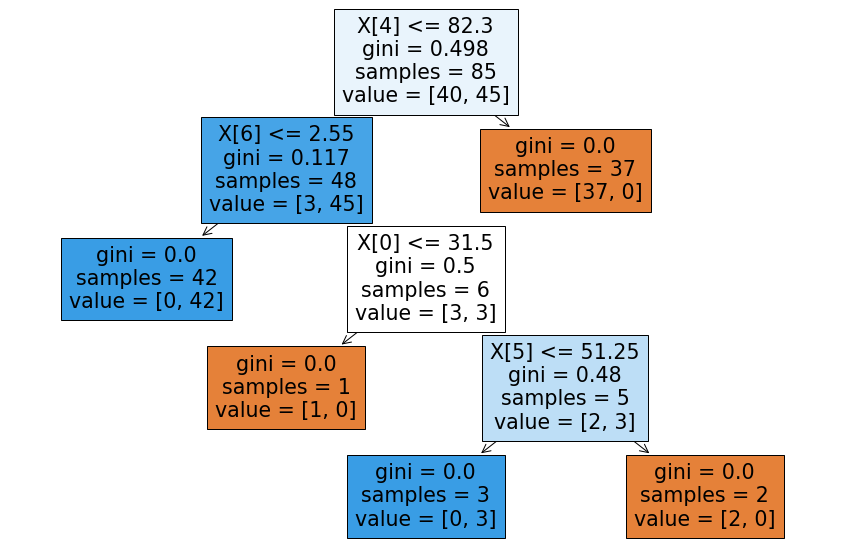

In [80]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [81]:
classifier.score(X_train,y_train)

1.0

In [82]:
pred = classifier.predict(X_test)

In [83]:
pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [84]:
confusion_matrix(y_test,pred)

array([[18,  1],
       [ 0, 18]], dtype=int64)

In [85]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.972972972972973
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.97        18

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [58]:
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
import os

In [122]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

# randomforest

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [54]:
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [55]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [56]:
classifier=RandomForestClassifier(criterion= 'gini',max_depth= 4,max_features= 'auto',n_estimators= 200)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [145]:
classifier.score(X_train,y_train)

1.0

In [59]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18  1]
 [ 0 18]]
0.972972972972973
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.97        18

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [93]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [147]:
X

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI
0,29,57,18,0.0,65.7,7.6,1.3,3.4
1,29,61,13,1.3,64.4,7.6,1.0,3.9
2,26,82,22,13.1,47.1,7.1,0.3,2.7
3,25,89,13,2.5,28.6,6.9,0.0,1.7
4,27,77,16,0.0,64.8,14.2,1.2,3.9
...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,16.3,2.5,6.2
118,31,66,11,0.0,85.7,24.9,4.0,9.0
119,32,47,14,0.7,77.5,8.8,1.8,6.8
120,26,80,16,1.8,47.4,7.7,0.3,3.0


# SVM

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,y_train)

SVC()

In [36]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [37]:
grid = GridSearchCV(svc,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [38]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [39]:
svc=SVC(C=0.1, gamma=1, kernel='poly')
svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [40]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.972972972972973

# naive bayes

In [42]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve
import matplotlib.pyplot as plt


In [44]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [46]:
y_pred = naive_bayes.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.972972972972973

In [50]:
naive_bayes.score(X_train,y_train)

0.9411764705882353

# ols

In [86]:
import statsmodels.api as sm

In [93]:
x=df1['Rain ']

In [100]:
X1= sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [101]:
est=sm.OLS(y,X1)

In [102]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Classes     R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     50.55
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           7.49e-34
Time:                        11:40:24   Log-Likelihood:                 4.3304
No. Observations:                 122   AIC:                             9.339
Df Residuals:                     113   BIC:                             34.58
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8356      0.499      3.679      0.000       0.847       2.824
Temperature     0.0244      0.011      2.182      0.031       0.002       0.047
 RH            -0.0123      0.003     -4.189      0.000      -0.018      -0.006
 Ws             0.0235      0.009      2.630      0.010       0.006       0.041
Rain           -0.0207      0.012     -1.694      0.093      -0.045       0.004
FFMC           -0.0154      0.003     -5.153      0.000      -0.021      -0.009
DC             -0.0024      0.002     -0.971      0.334      -0.007       0.002
ISI            -0.1324      0.015     -8.815      0.000      -0.162      -0.103
BUI             0.0102      0.009      1.135      0.259      -0.008       0.028
==============================================================================
Omnibus:                        3.429   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.397
Skew:                          -0.166   Prob(JB):                        0.183
Kurtosis:                       3.747   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
d=df1.drop(['FFMC','ISI',' RH'],axis=1)

In [107]:
v=d.drop('Classes  ',axis=1)

In [109]:
w=d['Classes  ']  

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(v,w, test_size=0.3, random_state=0)

In [111]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [112]:
y_pred = naive_bayes.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.8918918918918919

In [114]:
naive_bayes.score(X_train,y_train)

0.9058823529411765

almost every model giving same accuracy so we will choose decision tree and save using pikle 

In [107]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [122]:
f=df2["Classes  "].str.strip()


In [123]:
d2=pd.DataFrame(f)

In [124]:
df2=df2.drop(['Classes  '],axis=1)

In [125]:
df2=pd.concat([df2, d2], axis=1, join="inner")

df2